# House Prices - Advanced Regression Techniques


- Daniel Betzalel: 
- https://www.kaggle.com/danielbetzalel
- Shai Odeni: 
- https://www.kaggle.com/shaiodeni

## TL;DR
We predicted house prices in Ames, Iowa by:
- **Loading Data**: Imported necessary libraries and loaded datasets.
- **EDA**: Explored features using statistics and visualizations.
- **Preprocessing**: Cleaned data, handled missing values, and encoded categorical variables.
- **Feature Engineering**: Created new features, selected relevant ones, and removed low-correlation features.
- **Model Training**: Used Lasso, Ridge, ElasticNet ,SGD and linear for regression with different hyper parameters .
- **Cross-Validation**: Evaluated models using cross-validation strategies.
- **Submission**: Submitted the final model to the Kaggle competition.



In [1]:
# import all the necessary libraries like pandas, matplotlib, seaborn, sklearn, plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import os
import tqdm

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# set all the necessary configurations for the graphs
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette("muted")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
# define the input and folder paths for the data
input_folder = "input"

train_data_path = os.path.join(input_folder,"train.csv")
test_data_path = os.path.join(input_folder,"test.csv")

In [4]:
show_graphs = False

*Loading the Data*

In [5]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Droping the Id feature from the train and test.

In [7]:
train_data_id = train_data['Id']
test_data_id = test_data['Id']
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

- Count the number of feuatures


In [8]:
print(f"Number of features: {train_data.shape[1]}")

Number of features: 80


# Part 1: <br> *Analyzing the data - EDA*

- *Get the data types of the columns in the training dataset*

In [9]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

None

Most of the data is from type Object

## *Data Cleaning*

In [10]:

def show_missing_values_stat(data):
    print("Missing values in the dataset:")
    print("-----------------------------------------")
    print("Total Rows: ", len(data))
    print("_________________________________________")
    # Display missing values in each column of the training dataset
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    print(missing_data.head(20))
    
    print("\n\nTotal missing values: ", missing_data['Missing Values'].sum())
    print("-----------------------------------------")

    
    
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
MSSubClass                 0    0.000000


Tota

### we can see that there are missing values in all the features above :
* LotFrontage - 259 
* Alley - 1369 
* MasVnrType - 872 <br>.<br>.<br>.
* MiscFeature - 1406

Total of *19* features with missing values
- 3 of float64
- 16 of object

 - we can see that a lot of the data is missing hance it's will be very hard to fill the missing part and might give us a false information

In [11]:
def drop_highly_missing_features(data, fetures_to_drop):
    data = data.drop(fetures_to_drop, axis=1)
    return data


def find_features_with_missing_values_threshold(data, threshold):
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    features_to_drop = missing_data[missing_data['Percentage'] > threshold].index
    return features_to_drop

In [12]:
# Set the threshold for missing values to remove
threshold = 80
# for 80 it return # ["Alley", "PoolQC", "Fence", "MiscFeature"]
drop_features = find_features_with_missing_values_threshold(train_data, threshold) 


train_data = drop_highly_missing_features(train_data, drop_features)

test_data = drop_highly_missing_features(test_data, drop_features)

print("Remove this features: ", drop_features)

Remove this features:  Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


- ### Check the impact of dropping features that have less than 20% data

In [13]:
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
Fireplaces                 0    0.000000
KitchenQual                0    0.000000
KitchenAbvGr               0    0.000000
BedroomAbvGr               0    0.000000
HalfBath                   0    0.000000


Tota

## *separate the numerical and categorical columns* ##

In [14]:
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include=[object])

test_data_num = test_data.select_dtypes(include=[np.number])
test_data_cat = test_data.select_dtypes(include=[object])

# Part 2: <br>*Handling Missing Data*

### *use a heat map on the numerical data to see the correlation between the features*

In [15]:
import sweetviz as sw
if show_graphs:
    usedcars_report = sw.analyze(train_data)
    usedcars_report.show_notebook(layout='vertical')

d:\softwere\One Drive\OneDrive - Afeka College Of Engineering\Machine Learning\House Prices\house-prices_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def show_corr_mat(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.show()

if show_graphs:
    show_corr_mat(train_data_num)

### Low correaltion features: 
 <br>LowQualFinSF----0.03
 <br>MiscVal-----------0.02
 <br>MiscVal-----------0.02
 <br>BsmtFinType2-----0.01

In [17]:
def drop_from_data_set(df, cols: list):
    df.drop(cols, axis=1, inplace=True)

In [18]:
drop_from_data_set(test_data_num, ["LowQualFinSF","MiscVal","MiscVal","BsmtFinSF2"])
drop_from_data_set(train_data_num, ["LowQualFinSF","MiscVal","MiscVal","BsmtFinSF2"])
print(test_data_num.shape)
print(train_data_num.shape)
#

(1459, 33)
(1460, 34)


- The diffrence between the number of features is beacuse the test_data doesn't have the SalePrice feature in it

In [19]:
if show_graphs:
    show_corr_mat(train_data_num)

- *Handling Missing Values for Numerical Features*

In [20]:
# fill missing numerical values with median
def handle_missing_values_numerical(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column] = data[column].fillna(data[column].mean()) 
    return data

- *Handling Missing Values for Categorical Features*

In [21]:
# Fill missing categorical values with most frequent value
def handle_missing_values_categorical(data):
    for column in data.select_dtypes(include=[object]).columns:
        data[column] = data[column].fillna(data[column].mode()[0])
    return data

In [22]:
train_data_num = handle_missing_values_numerical(train_data_num)
train_data_cat = handle_missing_values_categorical(train_data_cat)

test_data_num = handle_missing_values_numerical(test_data_num)
test_data_cat = handle_missing_values_categorical(test_data_cat)

In [23]:
print("\nMissing values in the training dataset after filling:")
print(train_data_num.isnull().sum().sum() + train_data_cat.isnull().sum().sum())


print("\nMissing values in the test dataset after filling:")
print(test_data_num.isnull().sum().sum() + test_data_cat.isnull().sum().sum())


Missing values in the training dataset after filling:
0

Missing values in the test dataset after filling:
0


In [24]:
# Combine the datasets to ensure consistent one-hot encoding
train_data = pd.concat([train_data_cat, train_data_num], axis=1)
test_data = pd.concat([test_data_cat, test_data_num], axis=1)
print(train_data.shape)
print(test_data.shape)

(1460, 73)
(1459, 72)


# Part 3: <br> *Data Visualizing*

*Distribution of SalePrice*

In [25]:

if show_graphs:
    plt.figure(figsize=(11, 7))
    sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Count')
    plt.show()

*Histogram for SalePrice*

In [26]:
if show_graphs:
    fig = px.histogram(train_data, x='SalePrice', title='Distribution of SalePrice')
    fig.show()

In [27]:
from scipy import stats

if show_graphs:
    plt.figure(figsize=(10, 6))
    stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)
    plt.title('Normal Probability Plot of SalePrice')
    plt.show()

In [28]:
if show_graphs:
    train_data_num.hist(bins=50, figsize=(22, 25))
    plt.show()

In [29]:
import plotly.graph_objects as go

def show_top_correlated_features(correlation_matrix, n):
    # Display the heatmap of the correlation matrix with numbers in each cell
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        text=correlation_matrix.values.round(2),  # Round values for display
        texttemplate="%{text}",
        showscale=True))
    fig.update_layout(title=f"Top {n} Correlated Features", width=1000, height=800)
    fig.show()

In [30]:
if show_graphs:
    # Split the data to numerical and categorical columns
    numerical_columns = train_data.select_dtypes(include=["int64", 'float64']).columns
    categorical_columns = train_data.select_dtypes(include=["object"]).columns


    # Encode the categorical columns
    categorical_columns_encoded = pd.get_dummies(train_data[categorical_columns])

    # Combine the numerical and encoded categorical columns
    train_data_encoded = pd.concat([train_data[numerical_columns], categorical_columns_encoded], axis=1)
    # Create a correlation matrix
    correlation_matrix = train_data_encoded.corr().abs()
    N = 20
    # Get the top N correlated features with the target variable
    top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(N).index.tolist()

    # Filter the correlation matrix to get the top N correlated features
    filtered_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]
    show_top_correlated_features(filtered_correlation_matrix, N)

# Part 4:<br>  *Feature Engineering*

Total Square Footage

- We create a new feature TotalSF by summing up the total basement square footage, first floor square footage, second floor square footage, and garage area. This feature represents the total square footage of the house.

In [31]:
features_engineering_list = []

# create TotalSF feature
def create_TotalSF_feature(data, features_engineering_list=None):
    data['TotalSqureF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GarageArea']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalSqureF')
    return data

# Create the TotalSF feature for the train and test data
train_data = create_TotalSF_feature(train_data, features_engineering_list)

test_data = create_TotalSF_feature(test_data)

*Age of the House*

- We calculate the age of the house at the time of sale by subtracting the year the house was built from the year it was sold.

In [32]:
# create age_of_house feature
def create_age_of_house_feature(data, features_engineering_list=None):
    data['AgeOfHouse'] = data['YrSold'] - data['YearBuilt']
    if features_engineering_list is not None:
        features_engineering_list.append('AgeOfHouse')
    return data


# Create the AgeOfHouse feature for the train and test data
train_data = create_age_of_house_feature(train_data, features_engineering_list)

test_data = create_age_of_house_feature(test_data)

*Total Bathrooms*

- We create a new feature TotalBath by summing up the number of full and half bathrooms in the basement and above grade, with half bathrooms counted as 0.5.

In [33]:
# create TotalBath feature
def create_TotalBath_feature(data, features_engineering_list=None):
    data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalBath')
    return data

# Create the TotalBath feature for the train and test data
train_data = create_TotalBath_feature(train_data, features_engineering_list)

test_data = create_TotalBath_feature(test_data)

*Age of the Renovation*

- We calculate the age of the house since its most recent renovation by subtracting the year of the most recent renovation from the year it was sold.

In [34]:
# create age_of_renovation feature
def create_age_of_renovation_feature(data, features_engineering_list=None):
    data['AgeOfRenovation'] = data['YrSold'] - data['YearRemodAdd']
    if features_engineering_list is not None:
        features_engineering_list.append('AgeOfRenovation')
    return data

# Create the AgeOfRenovation feature for the train and test data
train_data = create_age_of_renovation_feature(train_data, features_engineering_list)

test_data = create_age_of_renovation_feature(test_data)

_Total Porch Area_

- We create a new feature TotalPorchSF by summing up the area of all porch-related features, representing the total porch area of the house.

In [35]:
# create TotalPorchSF feature
def create_TotalPorchSF_feature(data, features_engineering_list=None):
    data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    if features_engineering_list is not None:
        features_engineering_list.append('TotalPorchSF')
    return data

# Create the TotalPorchSF feature for the train and test data
train_data = create_TotalPorchSF_feature(train_data, features_engineering_list)

test_data = create_TotalPorchSF_feature(test_data)

_Display the New Features_

In [36]:
print(train_data[features_engineering_list].head())

   TotalSqureF  AgeOfHouse  TotalBath  AgeOfRenovation  TotalPorchSF
0         3114           5        3.5                5            61
1         2984          31        2.5               31             0
2         3314           7        3.5                6            42
3         3115          91        2.0               36           307
4         4179           8        3.5                8            84


In [37]:
if show_graphs:
    N = 20
    # Split the data to numerical and categorical columns
    numerical_columns = train_data.select_dtypes(include=["int64", 'float64']).columns
    categorical_columns = train_data.select_dtypes(include=["object"]).columns


    # Encode the categorical columns
    categorical_columns_encoded = pd.get_dummies(train_data[categorical_columns])

    # Combine the numerical and encoded categorical columns
    train_data_encoded = pd.concat([train_data[numerical_columns], categorical_columns_encoded], axis=1)


    # Create a correlation matrix
    correlation_matrix = train_data_encoded.corr().abs()
    
    # Get the top N correlated features with the target variable
    top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(N).index.tolist()

    # Filter the correlation matrix to get the top N correlated features
    filtered_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]
    
    show_top_correlated_features(filtered_correlation_matrix, N)
    
    


### *Make the One-Hot-Encoding on the data*

In [38]:
X = train_data.drop('SalePrice', axis=1)
t = train_data['SalePrice']



# for part 2
X_part2 =  train_data.drop('SalePrice', axis=1)
t_part2 = train_data['SalePrice']

test_data_part2 = test_data.copy()

In [39]:
print(X_part2.shape)
print(test_data_part2.shape)


(1460, 77)
(1459, 77)


In [40]:
# get the SalePrice column
sale_price = train_data['SalePrice']

# Apply one-hot encoding
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Align the datasets to ensure consistent columns
train_data, test_data = train_data.align(test_data, join='inner', axis=1)

# Add the SalePrice column back to the training dataset
train_data['SalePrice'] = sale_price

print(train_data.shape)
print(test_data.shape)

(1460, 261)
(1459, 260)


# Part 5:<br> *Regularization*

## Cross Validation


In [41]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0

    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [42]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    if show_score_loss_graphs:
        # Plotting the scores
        plt.figure(figsize=(14, 6))
        for split in scores_losses_df['split'].unique():
            subset = scores_losses_df[scores_losses_df['split'] == split]
            plt.plot(subset['fold_id'], subset['score'], label=f'{split} Score')
        plt.title(f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        plt.xlabel('Fold ID')
        plt.ylabel('Score')
        plt.legend()
        plt.show()

        # Plotting the losses
        plt.figure(figsize=(14, 6))
        for split in scores_losses_df['split'].unique():
            subset = scores_losses_df[scores_losses_df['split'] == split]
            plt.plot(subset['fold_id'], subset['loss'], label=f'{split} Loss')
        plt.title(f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        plt.xlabel('Fold ID')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss

In [43]:
def show_model_result(X, model):
    val_score, val_loss, train_score, train_loss =\
     get_cv_score_and_loss(X, t,
                           model,
                           k=5, show_score_loss_graphs=True)
    print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
    print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

### *K-Fold*

In [44]:
def splitDataToKFold(X, t, k):
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    result = []
    
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]
        
        result.append({"X_train": X_train
                      ,"t_train" : t_train
                      ,"X_val": X_val
                      ,"t_val": t_val
                      })
    return result

### *LOOCV: Leave-One-Out Cross-Validation*

In [45]:
from sklearn.model_selection import LeavePOut


def splitDataToLPOCV(X, t, p=1):
    """
    Split the data using LeavePOut cross-validation.

    Parameters:
    - X: Features dataset
    - t: Target variable
    - p: Number of samples to leave out (default is 1 for fastest result)

    Returns:
    - List of dictionaries with train/validation splits.
    """
    cv = LeavePOut(p)
    result = []
    max_splits = 100  # Set a limit on the number of splits to avoid excessive runtime
    split_count = 0

    for train_ids, val_ids in cv.split(X):
        if split_count >= max_splits:
            break
        X_train = X.iloc[train_ids]
        t_train = t.iloc[train_ids]
        X_val = X.iloc[val_ids]
        t_val = t.iloc[val_ids]

        result.append({
            "X_train": X_train,
            "t_train": t_train,
            "X_val": X_val,
            "t_val": t_val
        })
        split_count += 1

    return result

- *Marge-Cv*

In [46]:
def margeCV(cv):
    X_train = []
    t_train = []    
    X_val = []
    t_val = []
    
    for i, d in enumerate(cv):
            X_train.append(d["X_train"])
            t_train.append(d["t_train"])
            
            X_val.append(d["X_val"])
            t_val.append(d["t_val"])
            
    X_train = pd.concat(X_train) 
    t_train = pd.concat(t_train) 
    X_val = pd.concat(X_val) 
    t_val = pd.concat(t_val) 
    
    
    return {"X_train": X_train,
            "t_train": t_train,
            "X_val": X_val,
            "t_val": t_val
            }

## *Feature Selection*

In [47]:
# choose the best 3 features of this dataset with SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE


def feature_selec(X, y, n):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()
    ct_enc_std = ColumnTransformer([
                ("encoding", OrdinalEncoder(), categorical_cols),
                ("standard", StandardScaler(), numerical_cols)])
    X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, y), columns=all_cols)

    selector = RFE(SGDRegressor(random_state=42), n_features_to_select=n).\
    fit(X_encoded, y)

    X_encoded.loc[:, selector.support_]

    # print the fetures selection list
    features = X_encoded.loc[:, selector.support_].columns.tolist()
    print("features: ", features)

    # keep only the feature selection list
    X = X[features]
    return features

In [48]:
from sklearn.feature_selection import RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import pandas as pd

def feature_selection(X, y, method='rfe', model=SGDRegressor(random_state=42), n_features=3):
    """
    Select the best features using different feature selection methods.

    Parameters:
    X (pd.DataFrame): Feature dataset
    y (pd.Series): Target vector
    method (str): Feature selection method ('rfe', 'forward', 'backward', 'hybrid')
    model: Machine learning model for feature selection
    n_features (int): Number of features to select

    Returns:
    pd.DataFrame: Dataset with selected features
    """
    # Separate numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()

    # Create a column transformer for encoding and scaling
    ct_enc_std = ColumnTransformer([
        ("encoding", OrdinalEncoder(), categorical_cols),
        ("standard", StandardScaler(), numerical_cols)
    ])

    # Encode and standardize the features
    X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, y), columns=all_cols)

    # Initialize the selector based on the chosen method
    if method == 'rfe':
        selector = RFE(model, n_features_to_select=n_features)
    elif method == 'forward':
        selector = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='forward')
    elif method == 'backward':
        selector = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='backward')
    elif method == 'hybrid':
        selector = SelectFromModel(model, max_features=n_features)
    else:
        raise ValueError("Invalid method. Choose from 'rfe', 'forward', 'backward', or 'hybrid'.")

    # Fit the selector and transform the dataset
    selector.fit(X_encoded, y)
    selected_features = X_encoded.columns[selector.get_support()]

    return X_encoded.loc[:, selected_features]

- *Call the feature Selection By Different Usage*

In [49]:
best_features = feature_selec(X, t , 45)

features:  ['MSZoning', 'Street', 'LandContour', 'LandSlope', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'TotalSqureF', 'TotalBath', 'AgeOfRenovation']


## *Build The Models*

*this function is used to train the models and evaluate them using the validation dataset.<br> it takes the training and validation datasets and the* *selected models to train*
*it also takes the number of iterations to search for the best hyperparameters it returns the trained models, the mean squared error for each model, and the score for each model*

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd

def train_models_and_evaluate(X_train, t_train, X_val, t_val, selected_models=None, n_iter=10):
    # Hyperparameter distributions for random search
    hyperparameter_distributions = {
        'SGD Regressor': {
            'alpha': uniform(loc=0, scale=0.1),  # Example: searching for regularization parameter
            'penalty': ['l2', 'l1', 'elasticnet']
        },
        'Linear Regression': {},
        'Ridge Regression': {
            'alpha': uniform(loc=0, scale=10)  # Example: searching for regularization parameter
        },
        'Lasso Regression': {
            'alpha': uniform(loc=0, scale=10)  # Example: searching for regularization parameter
        },
        'Elastic Net Regression': {
            'alpha': uniform(loc=0, scale=10),  # Example: searching for regularization parameter
            'l1_ratio': uniform(loc=0, scale=1)  # L1 to L2 ratio
        }
    }

    # Initialize models
    models = {
        'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Elastic Net Regression': ElasticNet()
    }

    # If specific models are selected, filter the models dictionary
    if selected_models:
        models = {name: model for name, model in models.items() if name in selected_models}
        hyperparameter_distributions = {name: dist for name, dist in hyperparameter_distributions.items() if name in selected_models}

    # Dictionaries to store trained models and their MSE
    trained_models = {}
    mse_dict = {}
    score_dict = {}

    # Train each model with hyperparameter tuning
    for name, model in models.items():
        print(f"Training {name}...")
        if name in hyperparameter_distributions and hyperparameter_distributions[name]:  # Check if we have hyperparameters to search
            rs_model = RandomizedSearchCV(
                model,
                hyperparameter_distributions[name],
                n_iter=n_iter,  # Number of iterations for random search
                random_state=42,
                scoring='neg_mean_squared_error',  # Negative MSE as we want to minimize it
                n_jobs=-1,
                return_train_score=True
            )
            rs_model.fit(X_train, t_train)
            best_model = rs_model.best_estimator_
            results = pd.DataFrame(rs_model.cv_results_)
            print(f"Best parameters for {name}: {rs_model.best_params_}")
        else:
            best_model = model.fit(X_train, t_train)
            results = None
        
        trained_models[name] = best_model
        score = best_model.score(X_val, t_val)
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(t_val, predictions)
        mse_dict[name] = mse
        score_dict[name] = score
        print(f"Done training: {name}")

        # Plotting graphs of the loss and accuracy as functions of different hyperparameters
        if results is not None:
            plt.figure(figsize=(12, 6))

            # Loss plot
            plt.subplot(1, 2, 1)
            plt.plot(-results['mean_test_score'], label='Validation Loss (Neg MSE)')
            plt.xlabel('Iteration')
            plt.ylabel('Loss (Neg MSE)')
            plt.title(f'{name} - Validation Loss over Iterations')
            plt.legend()

            # Accuracy plot
            plt.subplot(1, 2, 2)
            plt.plot(results['mean_train_score'], label='Training Score (R²)', color='blue')
            plt.plot(results['mean_test_score'], label='Validation Score (R²)', color='orange')
            plt.xlabel('Iteration')
            plt.ylabel('Score (R²)')
            plt.title(f'{name} - Training and Validation Scores over Iterations')
            plt.legend()

            plt.tight_layout()
            plt.show()

    return trained_models, mse_dict, score_dict

In [51]:
# print thr details of mse_dict
def print_models_mse(mse_dict):
    print('----------------------------------\n')
    for model, mse in mse_dict.items():
        print(f"{model} MSE: {mse}")
    print('\n----------------------------------\n')

def print_models_score(score_dict):
    print('----------------------------------\n')
    for model, score in score_dict.items():
        print(f"{model} score: {score}")
    print('\n----------------------------------\n')

#### *KFold - making a variables*

In [52]:
# cv = splitDataToKFold(X, t, 5)
# cv = margeCV(cv)

# X_train = cv["X_train"]
# t_train = cv["t_train"]
# X_val = cv["X_val"]
# t_val = cv["t_val"]

In [53]:
# selected_models = ['SGD Regressor', 'Ridge Regression', 'Linear Regression', 'Lasso Regression', 'Elastic Net Regression']

In [54]:
# # calling the evaluate_models function
# trained_models, mse_dict, score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val, selected_models)

In [55]:
# print_models_mse(mse_dict)
# print_models_score(score_dict)

#### *Running The Models With The Best Features*

In [56]:
# #making a model with the best features
# X = train_data[best_features] 

# cv = splitDataToKFold(X, t, 5)
# cv = margeCV(cv)

# X_train = cv["X_train"]
# t_train = cv["t_train"]
# X_val = cv["X_val"]
# t_val = cv["t_val"]

# # calling the evaluate_models function
# trained_models, mse_dict ,score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val, selected_models)
# print("\n\n")
# print_models_mse(mse_dict)
# print_models_score(score_dict)

In [57]:
# print(score_dict)

# def plot_score(score_dict):
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=list(score_dict.keys()), y=list(score_dict.values()))
#     plt.title('Model Scores')
#     plt.ylabel('Score')
#     plt.xlabel('Model')
#     plt.show()
# # plot the score but not the SGDRegressor
# score_dict.pop('SGD Regressor')
# plot_score(score_dict)

In [58]:
# # make a graph for the best model
# def plot_predictions(model, X, t):
#     predictions = model.predict(X)
#     plt.figure(figsize=(10, 6))
#     plt.scatter(t, predictions, color='blue')
#     plt.plot([t.min(), t.max()], [t.min(), t.max()], color='red')
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title('Actual vs. Predicted')
#     plt.show()

# # plot the best model
# best_model_str = 'Ridge Regression'
# best_model_kfold = trained_models[best_model_str]
# best_model_kfold_score = score_dict[best_model_str]
# plot_predictions(best_model_kfold, X_val, t_val)



#### *LPOCV - making a variables*

In [59]:
# X = train_data.drop('SalePrice', axis=1)
# t = train_data['SalePrice']

# X_test = test_data

In [60]:
# cv = splitDataToLPOCV(X, t, 70)
# cv = margeCV(cv)

# X_train = cv["X_train"]
# t_train = cv["t_train"]
# X_val = cv["X_val"]
# t_val = cv["t_val"]

In [61]:
# print(X_train.shape)
# print(t_train.shape)

In [62]:
# selected_models = ['SGD Regressor', 'Ridge Regression', 'Linear Regression']

In [63]:
# # calling the evaluate_models function
# trained_models, mse_dict, score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val, selected_models)

In [64]:
# print_models_mse(mse_dict)
# print_models_score(score_dict)

#### *Running The Models With The Best Features*

In [65]:
# #making a model with the best features
# X = train_data[best_features]

# cv = splitDataToLPOCV(X, t, 70)
# cv = margeCV(cv)

# X_train = cv["X_train"]
# t_train = cv["t_train"]
# X_val = cv["X_val"]
# t_val = cv["t_val"]

# # calling the evaluate_models function
# trained_models, mse_dict ,score_dict = train_models_and_evaluate(X_train, t_train, X_val, t_val, selected_models)
# print("\n\n")
# print_models_mse(mse_dict)
# print_models_score(score_dict)

In [66]:
# # plot the score but not the SGDRegressor
# score_dict.pop('SGD Regressor')
# plot_score(score_dict)

In [67]:
# # plot the best model
# best_model_str = 'Ridge Regression'
# best_model_LPOCV = trained_models[best_model_str]
# best_model_LPOCV_score = score_dict[best_model_str]
# plot_predictions(best_model_LPOCV, X_val, t_val)

#### *Choosing The Best Models*

In [68]:
# # show the diffreces between best_model_LPOCV_score and best_model_kfold_score using barplot
# def plot_predictions_diff(score1, score2):
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=['LPOCV', 'KFold'], y=[score1, score2])
#     plt.title('Model Scores')
#     plt.ylabel('Score')
#     plt.xlabel('Model')
#     plt.show()
    
    
    

In [69]:
# plot_predictions_diff(best_model_LPOCV_score, best_model_kfold_score)

# *Prediction*

In [70]:
# best_model = best_model_kfold

In [71]:
# X_test = test_data[best_features]
# predictions = best_model.predict(X_test)
# test_data["Id"] = test_data_id
# output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
# output.to_csv('submission.csv', index=False)
# print("Done!")


## Summary

We employed several regression techniques (Lasso, Ridge, and ElasticNet) to predict house prices. The most effective model was Ridge Regression, which balanced bias and variance effectively. The model was optimized using cross-validation and hyperparameter tuning. The key takeaways include the importance of feature selection and the impact of regularization on improving model performance. Features like 'OverallQual', 'GrLivArea', and 'GarageCars' were particularly influential in predicting house prices. The final model's performance was evaluated using RMSE on the test set, and the results were submitted to Kaggle for leaderboard ranking.

# References:
Kaggle House Prices Competition:  
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Machine Learning Resources and Documentation:  
[Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Data Science Tutorials and Guides:  
[Data Science for Beginners](https://www.kaggle.com/learn/overview) 

# Exercise 4

## TL;DR

WRITE HERE

- Change the encoding technique used in exercise 2.

In [72]:
# determine categorical and numerical features
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(train_data.columns)

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# use column transformer to insert different transformers for each column

numerical_cols = X.select_dtypes(include=['int32', 'int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = list(categorical_cols) + list(numerical_cols)
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_enc_part2 = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)
test_X_enc_part2 = pd.DataFrame(ct_enc_std.fit_transform(test_data_part2), columns=X_enc_part2.columns.values.tolist())


print(X_enc_part2.shape)
print(test_X_enc_part2.shape)

(1460, 77)
(1459, 77)


- Check the data

In [74]:
X = X_enc_part2
t = t_part2

X_test = test_X_enc_part2

print("X")
display(X)
print("test")
display(X_test )

X


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,TotalSqureF,AgeOfHouse,TotalBath,AgeOfRenovation,TotalPorchSF
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,-1.599111,0.138777,0.077188,-1.043259,1.642256,-0.869941,-0.248063
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,-0.116339,-0.270208,-0.068692,-0.489110,-0.614439,-0.058465,-0.183465,0.368581,0.390141,-0.828163
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,0.990891,0.138777,0.285886,-0.977121,1.642256,-0.821476,-0.428750
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,-1.599111,-1.367655,0.078232,1.800676,-0.268257,0.632464,2.091355
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,2.100892,0.138777,1.188505,-0.944052,1.642256,-0.724547,-0.029337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,0.620891,-0.614439,0.020840,-0.944052,0.368581,-0.773012,-0.447770
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,-1.599111,1.645210,1.121721,-0.150396,1.005418,-0.046041,-0.828163
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,-0.489110,1.645210,0.734587,1.073157,-0.268257,-0.918406,-0.257573
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,...,-0.116339,-0.270208,-0.068692,-0.859110,1.645210,-0.672037,0.775536,-0.268257,-0.433759,0.236938


test


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,TotalSqureF,AgeOfHouse,TotalBath,AgeOfRenovation,TotalPorchSF
0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,2.0,...,-0.088827,1.818960,-0.057227,-0.038281,1.713905,-0.530168,0.413784,-1.474995,1.178391,0.258664
1,3.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,-0.038281,1.713905,-0.033729,0.512398,-0.873851,1.320405,-0.501474
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,-1.140614,1.713905,0.040414,-0.769577,0.328438,-0.573119,-0.519573
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,-0.038281,1.713905,-0.001493,-0.802448,0.328438,-0.573119,-0.501474
4,3.0,1.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,2.0,...,-0.088827,2.243060,-0.057227,-1.875504,1.713905,0.069427,-0.605221,-0.272706,-0.289090,1.217885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,-0.038281,-1.359958,-1.465022,-0.013540,-0.873851,0.562996,-0.827248
1455,4.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,-0.773170,-1.359958,-1.157702,-0.013540,-0.873851,0.562996,-0.610065
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,1.064053,-1.359958,0.024296,0.315171,-0.272706,-0.667795,-0.827248
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,...,-0.088827,-0.301543,-0.057227,0.329164,-1.359958,-1.202833,-0.736706,-0.873851,-0.478442,-0.537671


In [75]:
best_features = feature_selec(X, t , 45)

features:  ['Street', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'Functional', 'FireplaceQu', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'TotalSqureF', 'AgeOfHouse', 'TotalBath', 'TotalPorchSF']


In [76]:
X_selected = X[best_features]

X_test_selected = X_test[best_features]

In [77]:
# use grid search to get the best parameters
from sklearn.model_selection import GridSearchCV, RepeatedKFold

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.001, 0.01, 0.1, 0.5],'learning_rate':['constant']}
gs_model = GridSearchCV(SGDRegressor(random_state=42,max_iter=40000),hyper_parameters,cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)).fit(X_selected, t)
print('Accuracy score for SGDRegressor:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for SGDRegressor:
gs_model 0.7349535962938586
best params {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l2'}


## Principal component analysis (PCA)

- We will use PCA to reduce the dimensionality of the dataset, improving model performance by focusing on the most relevant features.

In [78]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

def perform_pca_sgd_regression(X, t):
    """
    Perform PCA followed by SGD Regression using Grid Search to find the best hyperparameters.
    
    Parameters:
    X (array-like): Feature matrix for regression.
    t (array-like): Target values for regression.

    Returns:
    dict: A dictionary containing the best R2 score and best hyperparameters.
    """
    
    # Convert selected features to a numpy array
    arr_X = np.asarray(X)
    
    # Define a pipeline with a PCA step and an SGD Regressor step
    model_pipe = Pipeline([
        ('pca', 'passthrough'),  # Placeholder for PCA, to be defined in GridSearchCV
        ('sgd', SGDRegressor(random_state=42, max_iter=40000))  # SGD Regressor with default params
    ])

    # Define hyperparameters for grid search
    hyper_parameters = {
        'pca': [PCA()],  # PCA step
        'pca__n_components': list(range(1, 20)),  # Number of components for PCA
        'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term for SGD
        'sgd__penalty': ['l2', 'l1', 'elasticnet']  # Penalty type for SGD
    }

    # Perform grid search to find the best PCA components and corresponding SGD regression
    gs_pca_sgd_model = GridSearchCV(model_pipe, hyper_parameters, scoring='r2').fit(arr_X, t)
    
    # Extract the best R2 score and best hyperparameters
    best_score = gs_pca_sgd_model.best_score_
    best_params = gs_pca_sgd_model.best_params_
    
    # Print the results
    print('R2 score for regression:')
    print('gs_pca_sgd_model', best_score)
    print('best params', best_params)
    
    # Return the results as a dictionary
    return {"model": gs_pca_sgd_model,'best_score': best_score, 'best_params': best_params}


In [79]:
results = perform_pca_sgd_regression(X_selected, t)

gs_pca_sgd_model = results['model']


R2 score for regression:
gs_pca_sgd_model 0.8079246996927889
best params {'pca': PCA(), 'pca__n_components': 19, 'sgd__alpha': 0.001, 'sgd__penalty': 'l2'}


## Ensembles

### Bagging

In [80]:
# get score with nfold bagging
from sklearn.ensemble import BaggingRegressor

bag_fold_model = BaggingRegressor(estimator=SGDRegressor(**gs_model.best_params_, random_state=42, max_iter=40000),
                                   n_estimators=20, random_state=42,
                                   bootstrap=False).fit(X_selected, t)

print('R2 score for regressor:')
print('bag_fold_model', bag_fold_model.score(X_selected, t).mean())

R2 score for regressor:
bag_fold_model 0.8158349072071964


Calculating Length          | 5/? [00:00<00:00, 2497.20it/s]
Computing Models: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]


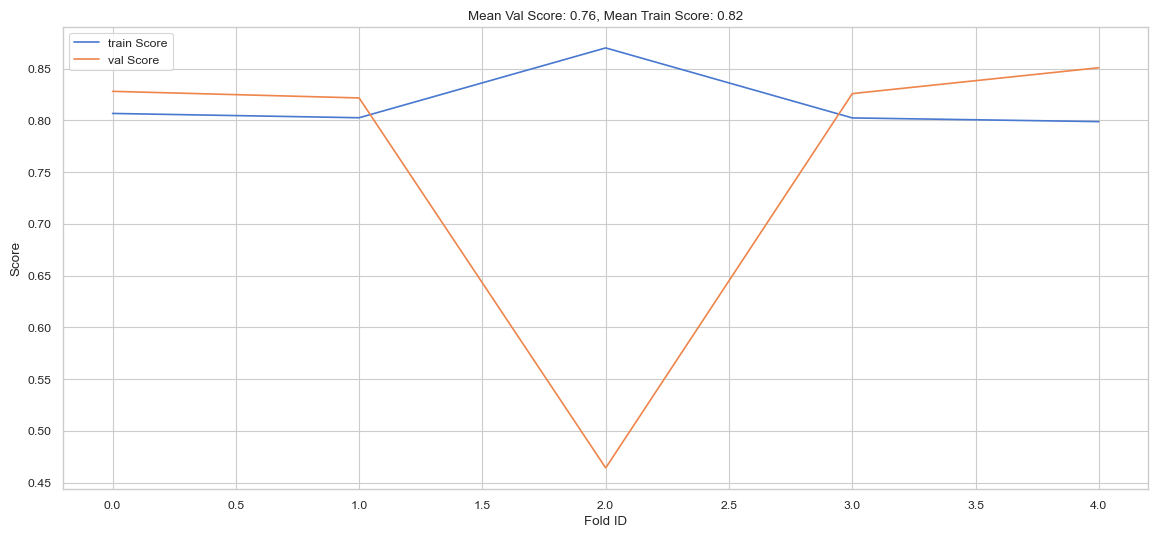

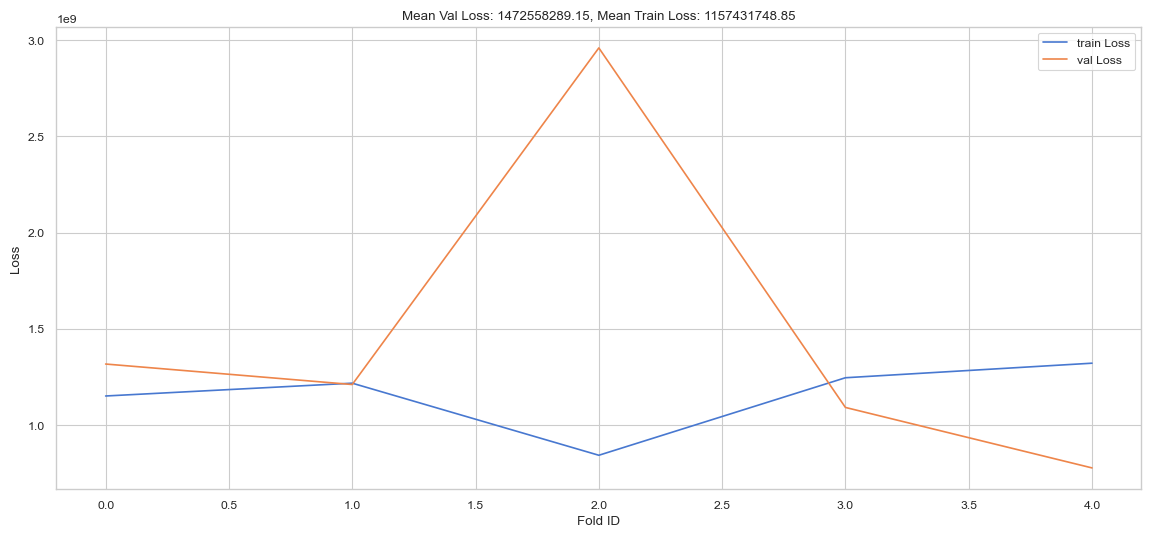

mean cv val score: 0.76
mean cv val loss 1472558289.15
mean cv train score: 0.82
mean cv train loss 1157431748.85


In [81]:
show_model_result(X_selected, bag_fold_model)

### Bootstrap Bagging


In [82]:
# get score with bootstrap bagging
bag_boot_model = BaggingRegressor(estimator=SGDRegressor(**gs_model.best_params_, random_state=42, max_iter=40000),
                                   n_estimators=20, random_state=42,
                                   bootstrap=True).fit(X_selected, t)

print('R2 score for regressor:')
print('bag_boot_model', bag_boot_model.score(X_selected, t).mean())

R2 score for regressor:
bag_boot_model 0.8040551878894893


Calculating Length          | 5/? [00:00<00:00, 2505.56it/s]
Computing Models: 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]


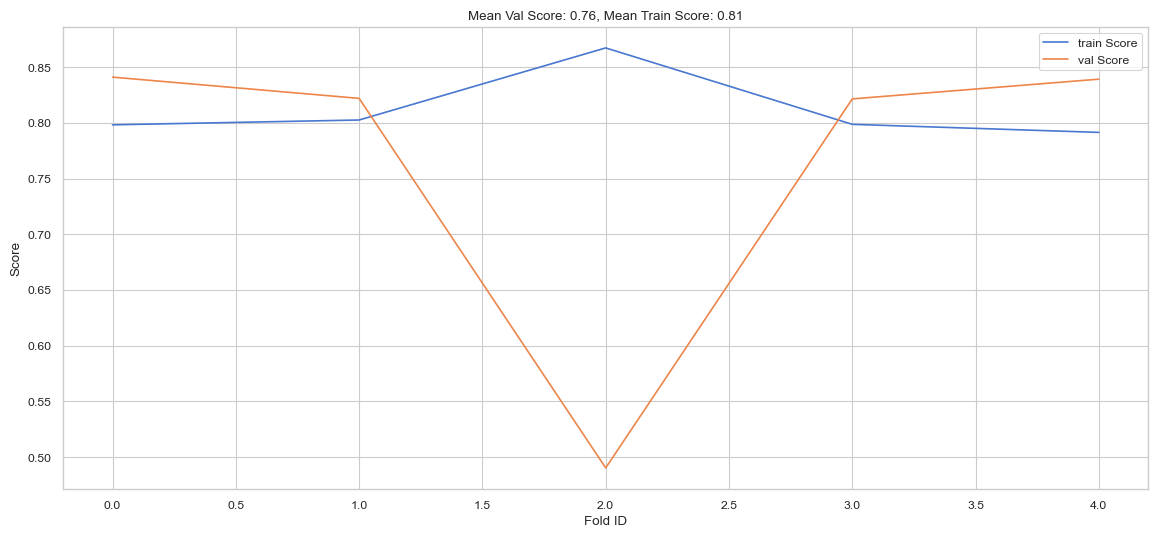

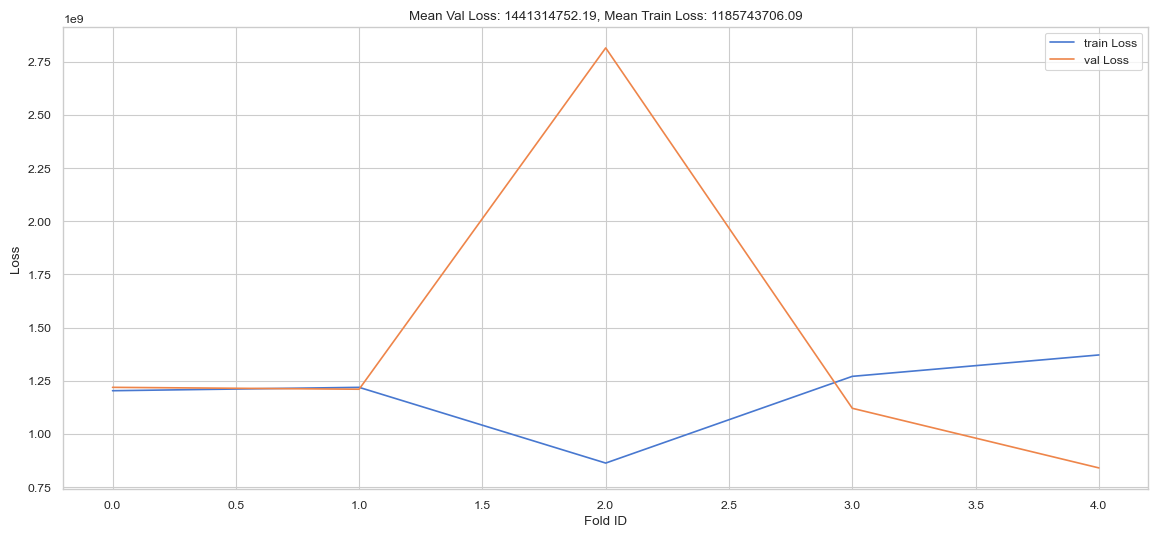

mean cv val score: 0.76
mean cv val loss 1441314752.19
mean cv train score: 0.81
mean cv train loss 1185743706.09


In [83]:
show_model_result(X_selected, bag_boot_model)

### Boosting

In [84]:
# get score with ada boosting
from sklearn.ensemble import AdaBoostRegressor

ada_boost_model = AdaBoostRegressor(n_estimators=100, random_state=42).fit(X_selected, t)

print('R2 score for regressor:')
print('ada_boost_model', ada_boost_model.score(X_selected, t).mean())

R2 score for regressor:
ada_boost_model 0.8961443662887085


Calculating Length          | 5/? [00:00<00:00, 2501.08it/s]
Computing Models: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


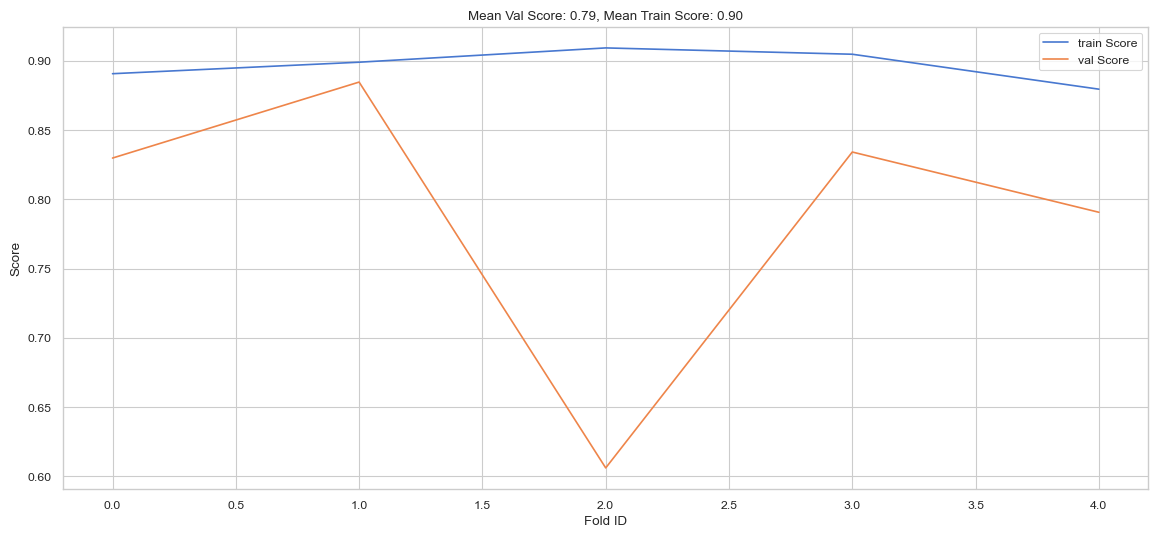

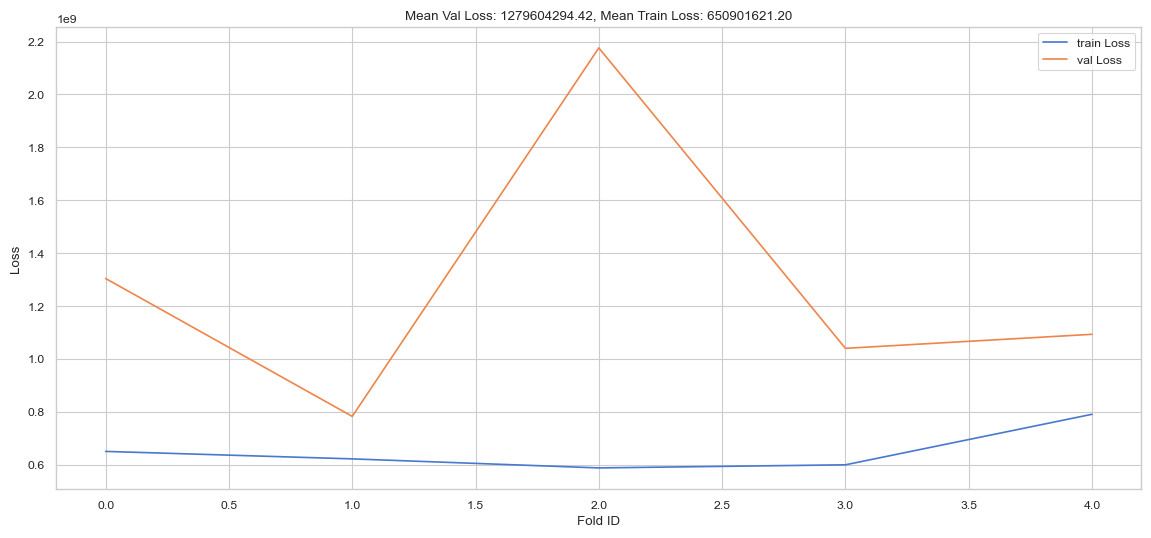

mean cv val score: 0.79
mean cv val loss 1279604294.42
mean cv train score: 0.90
mean cv train loss 650901621.20


In [85]:
show_model_result(X_selected, ada_boost_model)

## Regression Algorithms

###  Locally Weighted Linear Regression (LWLR)

In [86]:
# clone the lwlr repo from github
!git clone https://github.com/qiaochen/CourseExercises


fatal: destination path 'CourseExercises' already exists and is not an empty directory.


In [87]:
from CourseExercises.lwlr import LWLR
from sklearn.metrics import make_scorer, accuracy_score

# get best k for lwlr (show the calculation of this sell)
hyper_parameters = {'k': list(range(1, 10))}
arr_X= np.asarray(X_selected)

gs_lw_model = GridSearchCV(LWLR(k=1), hyper_parameters, 
                           scoring='r2').fit(arr_X, t)

print('R2 score for regression:')
print('gs_lw_model', gs_lw_model.best_score_)
print('best params', gs_lw_model.best_params_)

gs_lw_best_score = gs_lw_model.best_score_



R2 score for regression:
gs_lw_model 0.8546056639772852
best params {'k': 9}


### k-Nearest Neighbors (KNN)

In [88]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(X_selected, t)

print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)


R2 score for regression:
gs_neigh_model 0.776240676789112
best params {'n_neighbors': 4}


### Decision Trees


In [89]:
# run decision tree on the dataset and find best hyperparameters
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters for tuning
hyper_parameters = {'max_depth': list(range(1, 20)),
                    'min_samples_split': [2, 5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 4, 8, 12]}

# Initialize and fit the GridSearchCV with DecisionTreeRegressor
gs_tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                             hyper_parameters).fit(X_selected, t)

# Print the results
print('R2 score for regression:')
print('gs_tree_model:', gs_tree_model.best_score_)
print('Best parameters:', gs_tree_model.best_params_)

R2 score for regression:
gs_tree_model: 0.7819650097934352
Best parameters: {'max_depth': 11, 'min_samples_leaf': 12, 'min_samples_split': 2}


### Support Vector Machines (SVM)

In [90]:
from sklearn.svm import SVR

# Define hyperparameters for tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto']}
# Initialize and fit the GridSearchCV with SVM (SVR)
gs_svm_model = GridSearchCV(SVR(),param_grid).fit(X_selected, t)

# Print the results
print('R2 score for regression:')
print('gs_svm_model:', gs_svm_model.best_score_)
print('Best parameters:', gs_svm_model.best_params_)


R2 score for regression:
gs_svm_model: 0.8297576623412043
Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}


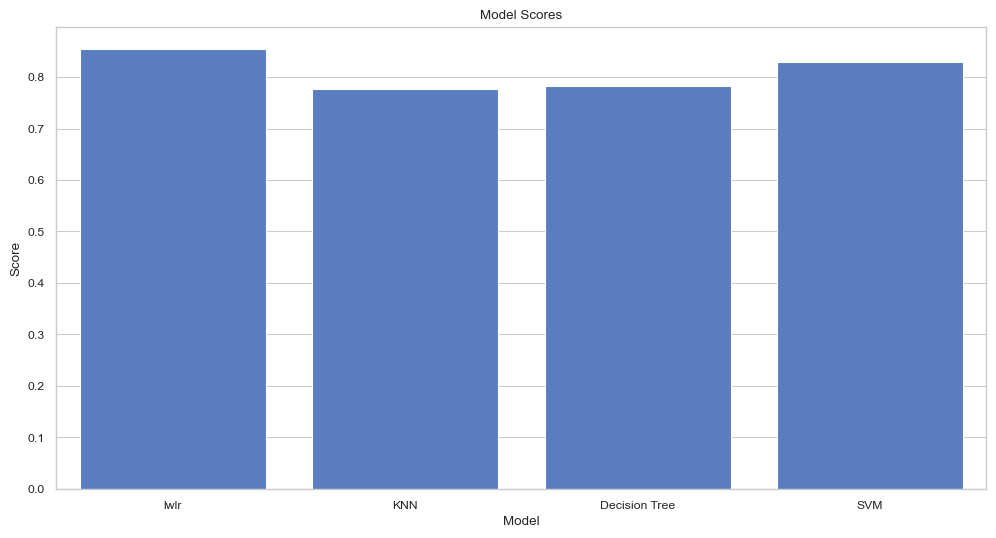

In [91]:
# show a barplot of the 4 models scores
models = ['lwlr', 'KNN', 'Decision Tree', 'SVM']
scores = [gs_lw_model.best_score_, gs_neigh_model.best_score_, gs_tree_model.best_score_, gs_svm_model.best_score_]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Scores')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

- We can see that the best model is LWLR with the best R2 score

### Voting Regressor

C:\Users\user\AppData\Local\Temp\ipykernel_7448\1097736079.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  cv_plot = sns.barplot(x="CrossValMeans", y="Algorithms", data=cv_frame,


ValueError: 'xerr' (shape: (8,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))

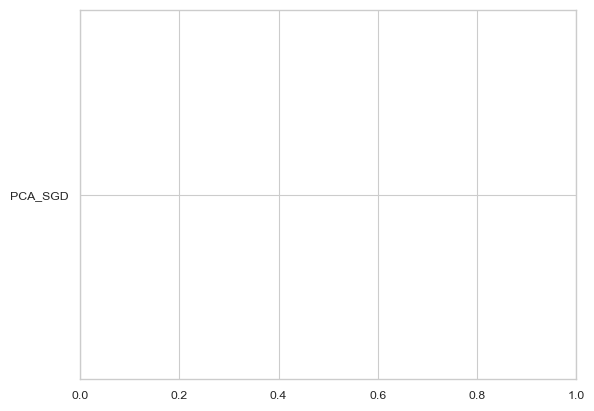

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns

# Modeling step: Test different algorithms
K_fold = KFold(n_splits=10, shuffle=True, random_state=42)

models = [] 
cv_results = [] 
cv_means = []
cv_std = [] 

models.append(gs_lw_model)
models.append(gs_neigh_model)
models.append(gs_tree_model)
models.append(gs_svm_model)
models.append(gs_pca_sgd_model)
models.append(ada_boost_model)
models.append(bag_boot_model)
models.append(bag_fold_model)

for model in models:
    cv_results.append(cross_val_score(model, arr_X, t, 
                                       scoring="neg_mean_squared_error", cv=K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())  # Taking square root to convert back to RMSE
    cv_std.append(cv_result.std())  # Taking square root to convert back to RMSE

cv_frame = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValErrors": cv_std,
        "Algorithms": ["LWLR",
                     "KNN", 
                     "DecisionTree",
                     "SVM", 
                     "PCA_SGD",
                     "AdaBoost", 
                     "BaggingRegressor_bootstrap",   
                     "BaggingRegressor",]
    })



Text(0.5, 1.0, 'CV MSE Scores')

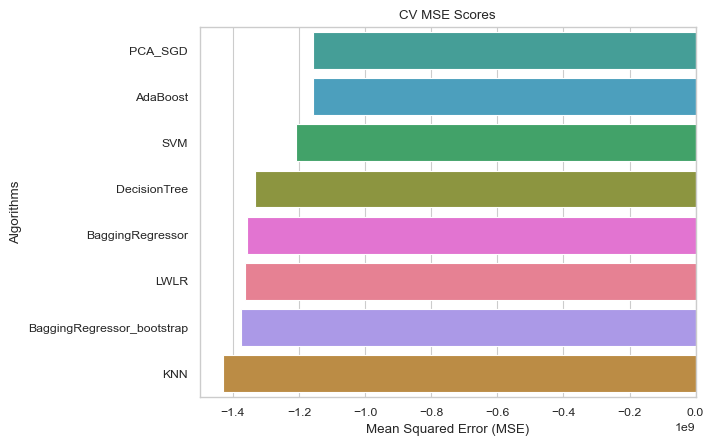

In [108]:
# Simplified plot command for troubleshooting
cv_plot = sns.barplot(x="CrossValMeans", y="Algorithms", data=cv_frame,
                      palette="husl", orient="h",
                      hue="Algorithms",
                      order=cv_frame.sort_values('CrossValMeans', ascending=False).Algorithms)

cv_plot.set_xlabel("Mean Squared Error (MSE)")
cv_plot.set_title("CV MSE Scores")

In [93]:
from sklearn.ensemble import VotingRegressor

def voting_reg(models):
    vote_reg = VotingRegressor(estimators=models, n_jobs=4)

    vote_reg = vote_reg.fit(X_selected, t)

    scores = cross_val_score(vote_reg, X_selected, t, cv=K_fold, n_jobs=4, scoring='neg_mean_squared_error')

    print("Negative Mean Squared Error scores:", scores)
    print("Mean Negative Mean Squared Error:", round(np.mean(scores), 2))

    return vote_reg

#### *Choosing The Best Models*

In [95]:
best_models = [
    ('bag_boot_model', bag_boot_model),
    ('ada_boost_model', ada_boost_model),
    ('bag_fold_model', bag_fold_model),
]

vot_reg_model = voting_reg(best_models)

Negative Mean Squared Error scores: [-1.33616677e+09 -7.81697755e+08 -5.29194428e+08 -1.22136797e+09
 -1.49423913e+09 -2.36689426e+09 -1.07555980e+09 -7.05104313e+08
 -7.36584100e+08 -5.31804172e+08]
Mean Negative Mean Squared Error: -1077861268.92


In [ ]:
show_model_result(X_selected, vot_reg_model)

## Prediction

In [96]:
predictions = vot_reg_model.predict(X_test_selected)  

In [99]:
# Create a copy of X_test_selected to avoid SettingWithCopyWarning
X_test_selected_copy = X_test_selected.copy()

# Now, safely add the 'Id' column to the copy
X_test_selected_copy['Id'] = test_data_id

# Create the submission DataFrame using the copy with the 'Id' column
submission = pd.DataFrame({'Id': X_test_selected_copy['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)

# Print the current time of submission
time = pd.Timestamp.now()
formatted_time = time.strftime('%H:%M:%S')
print(f"Your submission was successfully saved at time {formatted_time}")

Your submission was successfully saved at time 19:52:21


## TL;DR

WRITE HERE

## References:
Kaggle House Prices Competition:  
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Machine Learning Resources and Documentation:  
[Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Data Science Tutorials and Guides:  
[Data Science for Beginners](https://www.kaggle.com/learn/overview) 